# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report  

In [3]:
train = pd.read_csv("D:\YUKTA\Assignment\DS\Logistic Regression\Titanic_train.csv")
test = pd.read_csv("D:\YUKTA\Assignment\DS\Logistic Regression\Titanic_test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA - Traning data

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

**Missing values:**

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
train.drop(["PassengerId", "Name", "Ticket"], inplace = True, axis = 1)

In [11]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Verifying Unique values:**

In [13]:
#Gender
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [14]:
#Survived:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
#Pclass:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
#Embarked:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

**Visual Representation:**

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\3049791192.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y ="Age", data = train, palette = 'hls')


<Axes: xlabel='Survived', ylabel='Age'>

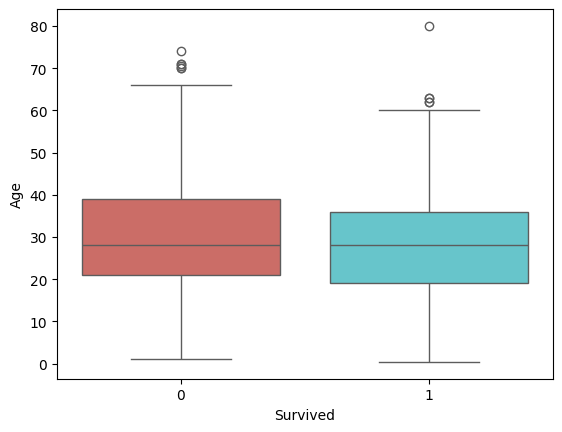

In [17]:
sns.boxplot(x="Survived", y ="Age", data = train, palette = 'hls')

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\895483555.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data= train, palette = 'Set2')


<Axes: xlabel='Survived', ylabel='count'>

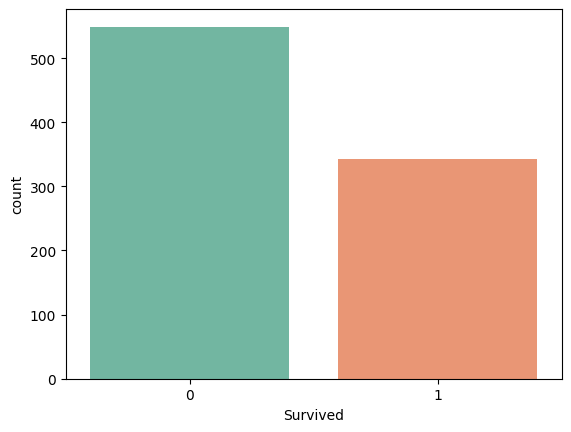

In [18]:
sns.countplot(x="Survived", data= train, palette = 'Set2')

Here we can see that number of person survived is less than the number of person died

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\3124108532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survived', col='Sex', kind='count', data=train, palette='rocket_r')


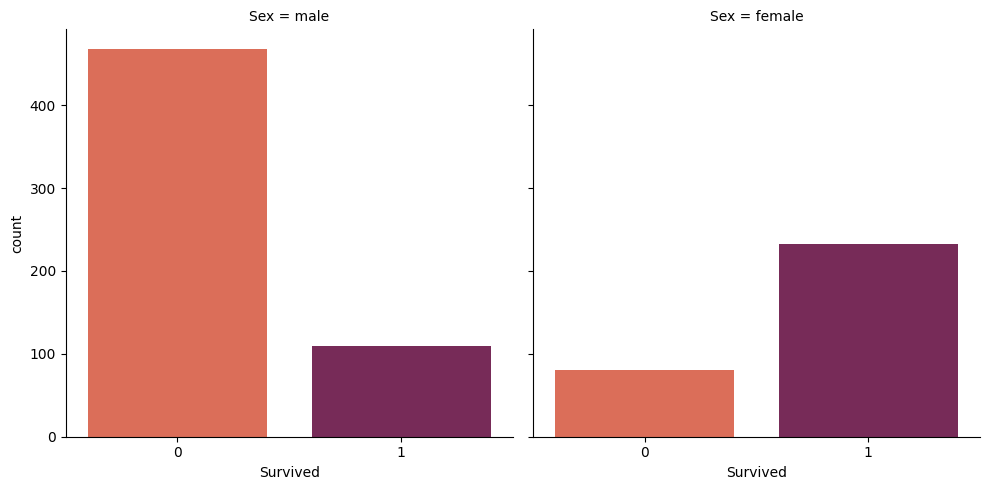

In [19]:
# Survival based on gender
sns.catplot(x='Survived', col='Sex', kind='count', data=train, palette='rocket_r')

More number of male passengers did not survive whereas people who survived are much likely to be female

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\2762255318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survived', col='Pclass', kind='count', data=train, palette='crest')


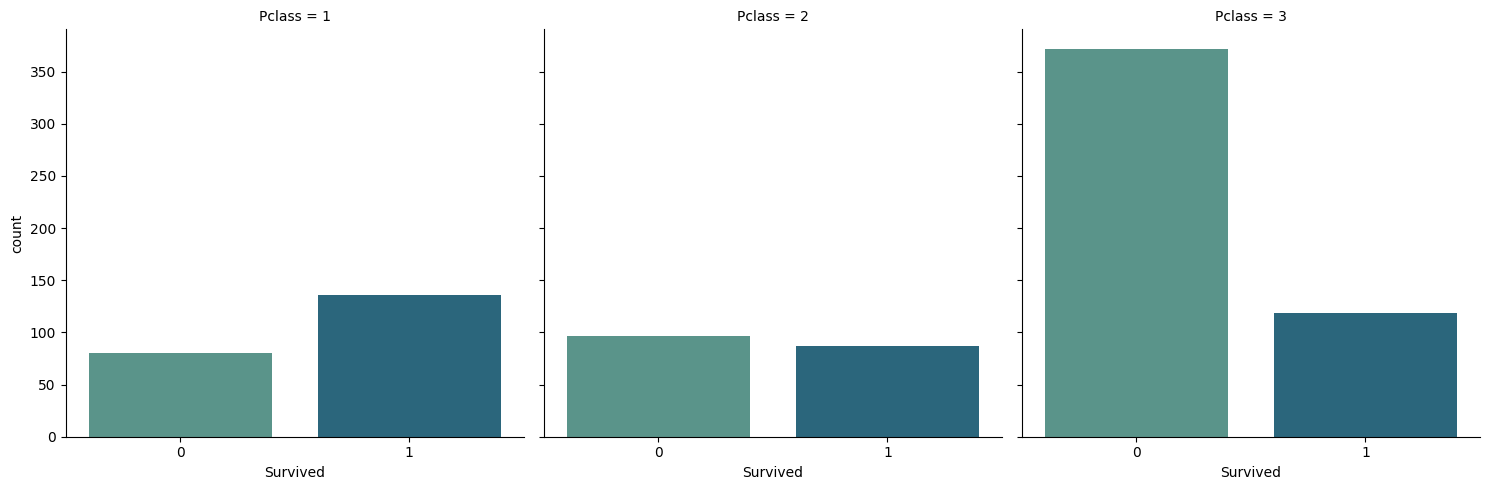

In [20]:
# Survival based on Passenger Class
sns.catplot(x='Survived', col='Pclass', kind='count', data=train, palette='crest')

From the above plot we can see that most of the people who did not survived belonged to passenger class 3

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\1129481654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Survived', col='Embarked', kind='count', data=train, palette='mako')


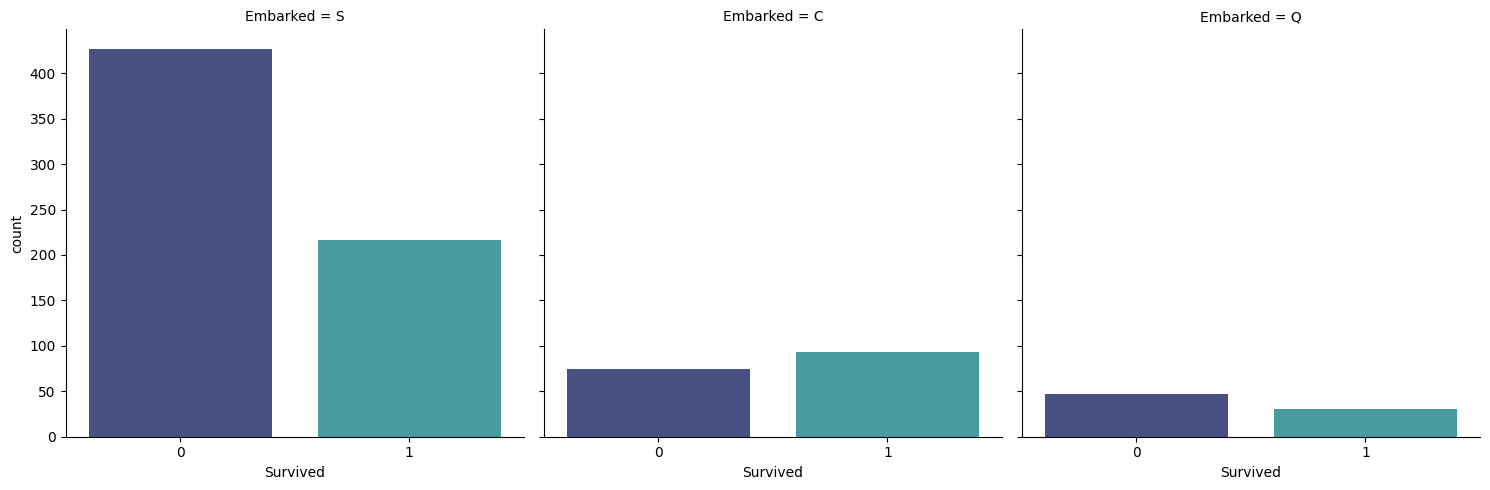

In [21]:
# Survival based on Embarked
sns.catplot(x='Survived', col='Embarked', kind='count', data=train, palette='mako')

Majority of the people boarded from Southampton port could not survived.

<Axes: xlabel='Age', ylabel='Count'>

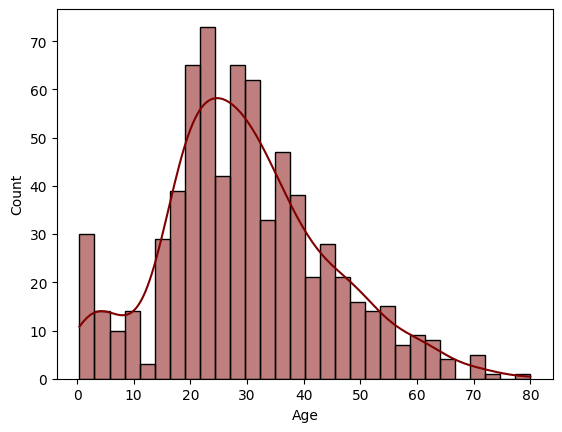

In [22]:
# Visual representation of age:
sns.histplot(train['Age'].dropna(), kde=True, color='maroon', bins=30)

Here we can see that most of the people belonged to age young age group 20-40 years

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\2144844709.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=train, palette='Spectral_r')


<Axes: xlabel='SibSp', ylabel='count'>

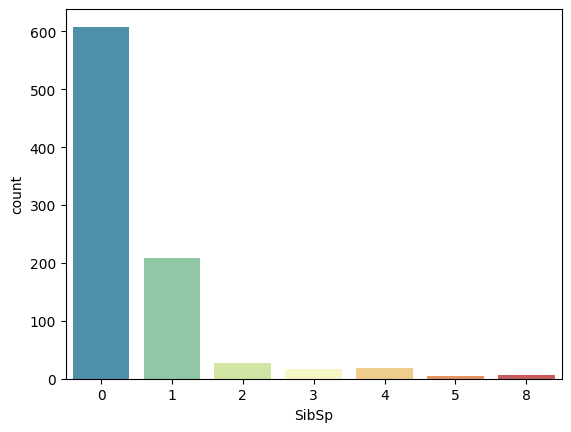

In [23]:
sns.countplot(x='SibSp', data=train, palette='Spectral_r')

Most of the people travelled did not have sibling or spouse along with them

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\2234443209.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch', data=train, palette='Paired')


<Axes: xlabel='Parch', ylabel='count'>

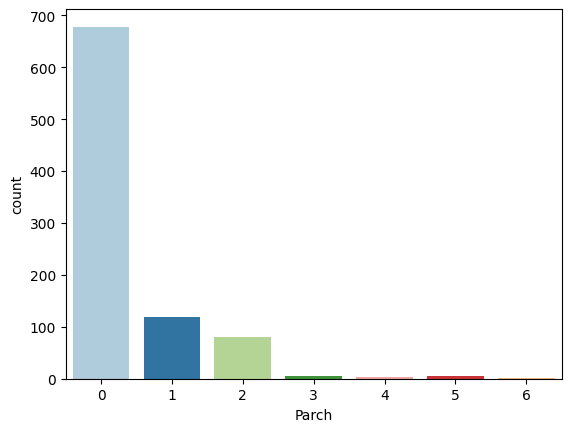

In [24]:
sns.countplot(x='Parch', data=train, palette='Paired')

The above visualisation clearly states most of the people travelled didnot have children accompanying them

**Heat map to check correlation:**

In [25]:
train_numeric_data = train.select_dtypes(include=[np.number])

<Axes: >

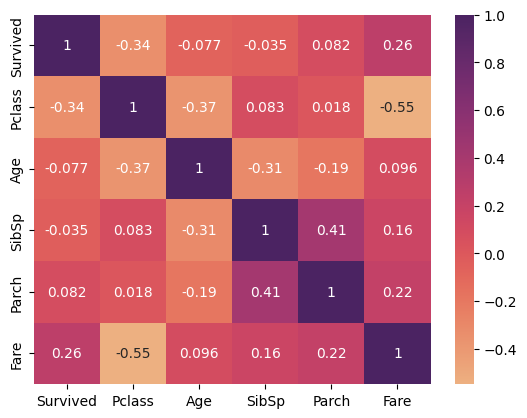

In [26]:
sns.heatmap(train_numeric_data.corr(), annot=True, cmap='flare')

**Handling the missing values**

For **age group** column there are 177 missing values
Replacing the missing values based on the median age values for each passenger class

<Axes: xlabel='Pclass', ylabel='Age'>

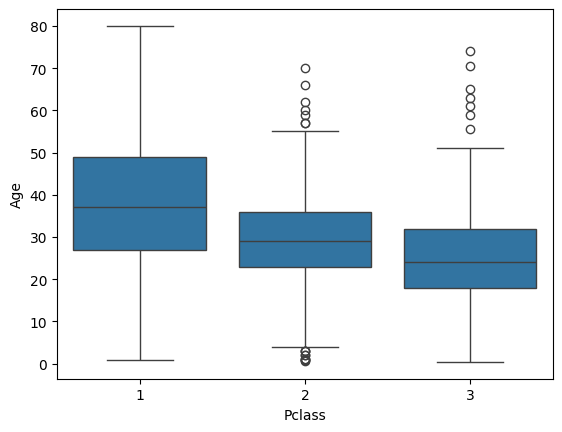

In [27]:
sns.boxplot(x='Pclass',y='Age',data=train)

The median of Pclass1 = 37, Pclass2 = 29 and PClass3 = 24.

In [28]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [29]:
train['Age'] = train[['Age','Pclass']].apply(impute_train_age,axis=1)

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\3981110378.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\3981110378.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [30]:
train['Age'].isnull().sum()

0

For the data values in **Cabin** column there are 687 missing values.
Cabins are represented as C85, C123 etc. So dropping thr e column.

In [31]:
train.drop('Cabin', axis=1, inplace=True)

In [32]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In case of **Embarked** there are only 2 missing values hence dropping those two observations.

In [33]:
train.dropna(inplace=True)

In [34]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

There are no missing values.

In [35]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Encoding Categorical Features**

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()

In [38]:
train['Sex'] = label_encoder.fit_transform(train['Sex'])

In [39]:
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])

In [40]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Logistic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
train.shape

(889, 8)

In [43]:
X = train.drop(['Survived'], axis=1)
y = train['Survived']

In [44]:
LR = LogisticRegression()
LR.fit(X, y)

LogisticRegression()

In [45]:
LR.coef_   # coefficients of features 

array([[-1.13234338e+00, -2.62169175e+00, -4.18962628e-02,
        -3.28657087e-01, -7.93989591e-02,  1.93044700e-03,
        -2.00611402e-01]])

In [46]:
LR.predict_proba (X) # Probability values   

array([[0.91059203, 0.08940797],
       [0.08166109, 0.91833891],
       [0.3862313 , 0.6137687 ],
       ...,
       [0.47764256, 0.52235744],
       [0.36586113, 0.63413887],
       [0.90110954, 0.09889046]])

In [47]:
y_pred = LR.predict(X)
train['y_pred'] = y_pred
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y_pred
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,1
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,1
4,0,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,0
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,24.0,1,2,23.4500,2,1
889,1,1,1,26.0,0,0,30.0000,0,1


In [48]:
y_prob = pd.DataFrame(LR.predict_proba(X.iloc[:,:]))
new_df = pd.concat([train,y_prob],axis=1)
new_df  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y_pred,0,1
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0,0.0,0.910592,0.089408
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.081661,0.918339
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0,1.0,0.386231,0.613769
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0,1.0,0.108191,0.891809
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0,0.0,0.926582,0.073418
...,...,...,...,...,...,...,...,...,...,...,...
888,0.0,3.0,0.0,24.0,1.0,2.0,23.4500,2.0,1.0,0.901110,0.098890
889,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,1.0,NaN,NaN
890,0.0,3.0,1.0,32.0,0.0,0.0,7.7500,1.0,0.0,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705300,0.294700


**Confusion Matrix**

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)

In [50]:
pd.crosstab(y, y_pred)

col_0,0,1
Survived,,
0,474,75
1,100,240


<Axes: >

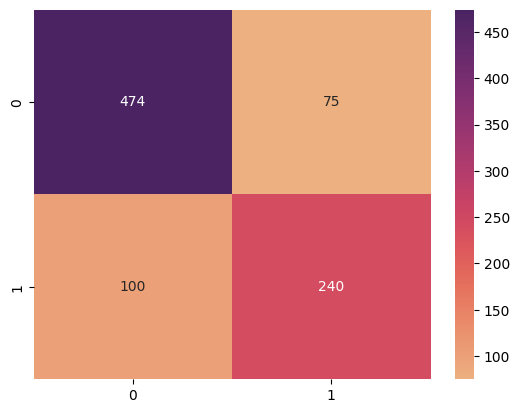

In [51]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='flare')

In [52]:
#type(y_pred)
accuracy = sum(y==y_pred)/train.shape[0]
accuracy 

0.8031496062992126

In [53]:
from sklearn.metrics import classification_report 
print (classification_report (y, y_pred))  

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       549
           1       0.76      0.71      0.73       340

    accuracy                           0.80       889
   macro avg       0.79      0.78      0.79       889
weighted avg       0.80      0.80      0.80       889



In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [55]:
Logit_roc_score=roc_auc_score(y,LR.predict(X))
Logit_roc_score  

0.7846351655416265

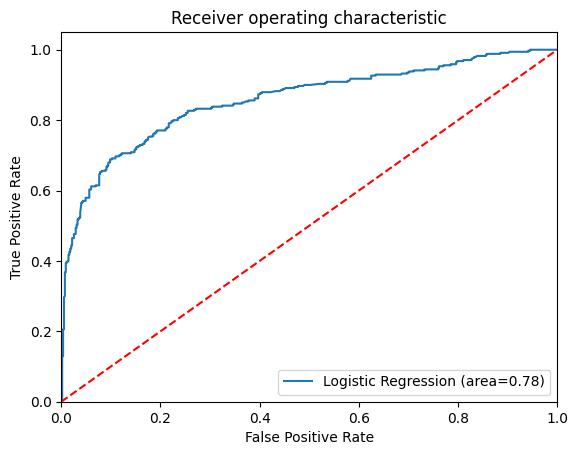

In [56]:
fpr, tpr, thresholds = roc_curve(y,LR.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()   

In [57]:
y_prob1 = pd.DataFrame(LR.predict_proba(X)[:,1])
y_prob1

,0
0,0.089408
1,0.918339
2,0.613769
3,0.891809
4,0.073418
...,...
884,0.257641
885,0.955373
886,0.522357
887,0.634139


In [58]:
import statsmodels.api as sm 

In [59]:
logit = sm.Logit(y, X)   

In [60]:
logit.fit().summary()  

Optimization terminated successfully.
         Current function value: 0.496405
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            6
Date:                Sat, 22 Jun 2024   Pseudo R-squ.:                  0.2538
Time:                        12:28:50   Log-Likelihood:                -441.30
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 7.376e-62
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0484      0.077      0.626      0.531      -0.103       0.200
Sex           -2.2777      0.180    -12.663      0.000      -2.630      -1.925
Age            0.0054      0.006      0.952      0.341      -0.006       0.017
SibSp         -0.2893      0.095     -3.042      0.002      -0.476      -0.103
Parch         -0.1144      0.112     -1.025      0.305      -0.333       0.104
Fare           0.0180      0.003      5.947      0.000       0.012       0.024
Embarked       0.1104      0.106      1.038      0.299      -0.098       0.319
==============================================================================
"""

In [61]:
#fpr  -- False positive rate

In [62]:
#tpr  -- True positive rate

In [63]:
from sklearn.metrics import accuracy_score 

In [64]:
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(LR.predict_proba(X)[:,1]>thres,1,0)
    accuracy_ls.append(accuracy_score(y, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls 

,thresholds,accuracy
85,0.543991,0.818898
84,0.558140,0.818898
81,0.563447,0.817773
70,0.601176,0.817773
71,0.597756,0.817773
...,...,...
301,0.051532,0.416198
302,0.049538,0.416198
303,0.049534,0.415073
304,0.015220,0.388076


In [65]:
from numpy import argmax
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh)) 

Best Threshold=0.558140


**Classification report for updated threshold value**

In [66]:
threshold = 0.525080
preds = np.where(LR.predict_proba(X)[:,1] > threshold, 1, 0)
print('Classification report for updated threshold value is:\t\n',classification_report(y,preds))   

Classification report for updated threshold value is:	
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       549
           1       0.80      0.70      0.74       340

    accuracy                           0.82       889
   macro avg       0.81      0.79      0.80       889
weighted avg       0.81      0.82      0.81       889



**CONCLUSION**

The model performs reasonably well overall, with an accuracy of **82%**. 
It is better at identifying non-survivors (class 0) than survivors (class 1), as indicated by the higher recall (0.89) and F1-score (0.86) for non-survivors. 
The precision for both classes is relatively balanced, though slightly higher for non-survivors.

The model's performance in terms of precision, recall, and F1-score suggests that it can be trusted more to correctly identify non-survivors than survivors.

For a Titanic survival prediction model, this performance might be considered satisfactory, especially if the focus is on correctly identifying non-survivors.

# Analysis for Test Data

# EDA 

In [67]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


There is no survival data in the test dataset

In [68]:
test.shape

(418, 11)

**Missing value**

In [69]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [71]:
test.drop(["PassengerId", "Name", "Ticket","Cabin"], inplace = True, axis = 1)

In [72]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


**Verifying Unique values:**

In [73]:
#Pclass:
test['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [74]:
#Embarked:
test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

**Handling Missing Values**

For age group column there are 86 missing values Replacing the missing values based on the median age values for each passenger class

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\963727406.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=test,palette='pink_r')


<Axes: xlabel='Pclass', ylabel='Age'>

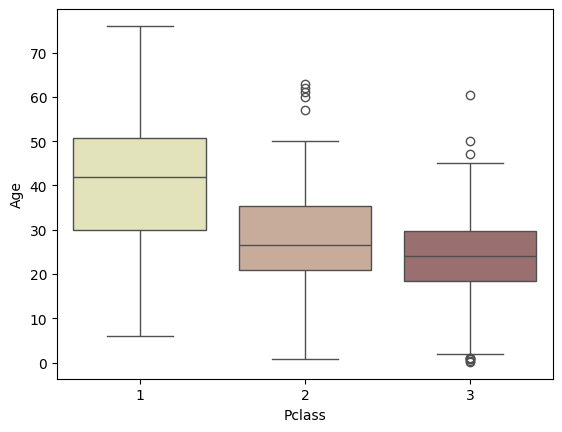

In [75]:
sns.boxplot(x='Pclass',y='Age',data=test,palette='pink_r')

The median of Pclass1 = 42, Pclass2 = 27 and PClass3 = 25.

In [76]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 25

    else:
        return Age

In [77]:
test['Age'] = test[['Age','Pclass']].apply(impute_test_age,axis=1)

C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\3601112268.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\yukta\AppData\Local\Temp\ipykernel_3048\3601112268.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Column Fare is having only one missing value, so we can drop that observation

In [78]:
null_columns=test.columns[test.isnull().any()]
row_num = (test[test["Fare"].isnull()][null_columns])
row_num

,Fare
152,NaN


In [79]:
test.iloc[152, :]

Pclass         3
Sex         male
Age         60.5
SibSp          0
Parch          0
Fare         NaN
Embarked       S
Name: 152, dtype: object

Missing value of Fare belong to a male passenger from Pclass 3 and age is 60.5

<Axes: xlabel='Fare', ylabel='Count'>

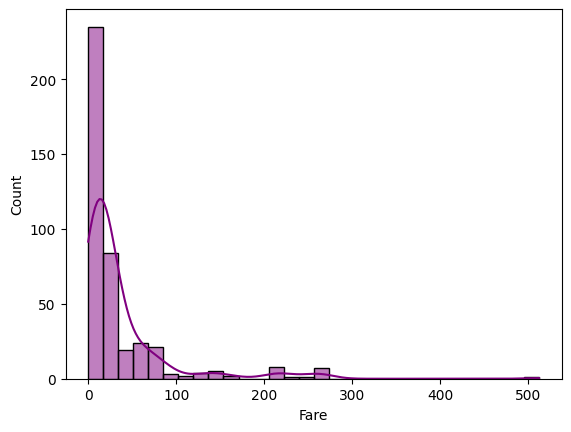

In [80]:
sns.histplot(test['Fare'].dropna(),kde=True,color='purple',bins=30)

From the plot it is clear, Fare is skewed toward lower value, so we can go for median.

In [81]:
Fare_median = test["Fare"].median()
Fare_median

14.4542

In [82]:
test = test.replace(np.NaN,14.4542)

In [83]:
test.iloc[152, :]

Pclass            3
Sex            male
Age            60.5
SibSp             0
Parch             0
Fare        14.4542
Embarked          S
Name: 152, dtype: object

In [84]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Encoding Categorical Features**

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
label_encoder = LabelEncoder()

In [87]:
test['Sex'] = label_encoder.fit_transform(test['Sex'])

In [88]:
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])

In [89]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


# Building Logistic Regression Model

In [90]:
X1 = train.drop(['Survived','y_pred'], axis=1)
y1 = train['Survived']

In [91]:
LR = LogisticRegression()
LR.fit(X1, y1)

LogisticRegression()

**Predicting survival variables for test data**

In [92]:
y_pred_test = LR.predict(test)

In [93]:
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [94]:
test['survived_pred'] = y_pred_test

In [95]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,survived_pred
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1


# CONCLUSION

Survival is highly dependent on Pclass. This indicates the majority of people who could afford enough money to get in Pclass 1, were most likely to survive.
62.96% of PClass 1 could survive
47.28% of Pclass2 could survive
24.24% of PClass3 could survive
Majority of the passenger who could survive are females.

Out of total females traveled 74.2% of them could survive.
Majority of the male passengers could not survive.

18.9% of total male traveled could only survive
Port from which the passengers have boarded also has a significant impact on the survival rate.

55.36% of Embarked C could survive
38.96% of Embarked Q could survive
33.7% of Embarked s could survive

# STREAMLIT

In [96]:
import streamlit as st

In [97]:
import joblib

In [98]:
# Save the model to a file
joblib.dump(LR, 'titanic_model.pkl')

['titanic_model.pkl']